In [322]:
import matplotlib.pyplot as plt
import numpy as np
import ellc
from ellc.ldy import LimbGravityDarkeningCoeffs, list_bands
import pandas as pd
#Names of column headers
names = ['logg','Teff','Z','xi','a1','a2','a3','a4','Filt','method','model']
#reading in data file
filename = 'tableeq5.dat'
dat = pd.read_csv(filename, delim_whitespace=True, header=None, names = names)

#xi = micro-turbulent velocity

# Z = -0.31
# Teff = 10450
# logg = 3.9
M_H = 0

#Effective temp. in Kelvin
T1 = 5000
#log gravity
logg1 = 2.5
#Relative Hydrogen abundance
Z = 0
xi = 2
#ellc wavelengths and filters
filters = [ 'B','C','H','I','J','K','Kp','R','U','V','b','u','v','y','u_','g_','r_','i_','z_' ]
wavelength = [442, 1547.5, 1630, 879.9, 1220, 2190, 2120, 634.9, 364, 540, 435, 354, 410.3, 1015, 360, 464, 621.5, 754.5, 870]
SDSSfilters = ['u,','g,','r,','i,','z,', "J", 'H', "K" ]   #These filters are formatted how they appear in the csv file
SDSSwavelength = [354, 464, 621.5, 754.5, 870, 1220, 1630, 2190]   #Correspond to each of above filters (in order)


In [323]:
# Setting up function to pick out proper rows from data file
#reading in data file
filename = 'tableeq5.dat'
dat = pd.read_csv(filename, delim_whitespace = True, header = None, names = names)
#Selecting rows with proper conditions (Teff, Metallicity, log gravity, etc.)

#Function to pick out certain row that meets stellar conditions (logg, Teff, etc.) in csv file
def get_row(logg, Teff, Z, Filt):
    selected_row = dat[(dat['logg'] == logg) & (dat['Teff'] == Teff) & (dat['xi'] == 2) & (dat['Z'] == Z)&\
                      (dat['Filt'] == Filt) & (dat['model'] == 'ATLAS')]
    a1_value = selected_row['a1'].values[0]
    a2_value = selected_row['a2'].values[0]
    a3_value = selected_row['a3'].values[0]
    a4_value = selected_row['a4'].values[0]
#     print(selected_row)
    return a1_value, a2_value, a3_value, a4_value


In [345]:
SDSSfilters = ['u_','g_','r_','i_','z_', "J", 'H', "K" ]
SDSStable_filters = ['u,','g,','r,','i,','z,', "J", 'H', "K" ]
SDSSwavelength = [354, 464, 621.5, 754.5, 870, 1220, 1630, 2190]

#Setting up dictionaries and their respective keys
filtVals  = dict()
tableVals = dict()
tableVals['a1'] = np.array([])
tableVals['a2'] = np.array([])
tableVals['a3'] = np.array([])
tableVals['a4'] = np.array([])
filtVals['a1']  = np.array([])
filtVals['a2']  = np.array([])
filtVals['a3']  = np.array([])
filtVals['a4']  = np.array([])

#'For' loop to place each value (from table or ellc) in proper array in dictionary
for w,f,t in zip(SDSSwavelength, SDSSfilters, SDSStable_filters):
    ldy_filt = ellc.ldy.LimbGravityDarkeningCoeffs(f)
    a1, a2, a3, a4, y = ldy_filt(T1, logg1, M_H)
    filtVals['a1']  = np.append(filtVals['a1'],a1)
    filtVals['a2']  = np.append(filtVals['a2'],a2)
    filtVals['a3']  = np.append(filtVals['a3'],a3)
    filtVals['a4']  = np.append(filtVals['a4'],a4)
    a1, a2, a3, a4  = get_row(logg1, T1, Z, t)
    tableVals['a1'] = np.append(tableVals['a1'], a1)
    tableVals['a2'] = np.append(tableVals['a2'], a2)
    tableVals['a3'] = np.append(tableVals['a3'], a3)
    tableVals['a4'] = np.append(tableVals['a4'], a4)



# # Printing for debugging # #
# print(' ')
# print('Filter Values Dictionary:')
# print(filtVals)
# print(' ')
# print('Table Values Dictionary:')
# print(tableVals)
# print(' ')


In [346]:
right_stars = np.where((dat['logg'] == 4.5) & (dat['Teff'] == 5500) & (dat['xi'] == 2))
# print(right_stars)

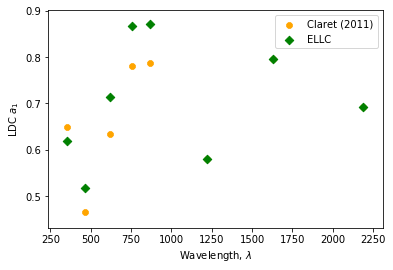

In [347]:
# A1 table values-ellc values plot

table = plt.scatter(SDSSwavelength, tableVals['a1'], c = 'orange', marker = '8')
plt.xlabel('Wavelength, $\lambda$')
plt.ylabel('LDC $a_1$')
filt_plot = plt.scatter(SDSSwavelength, filtVals['a1'], c = 'green', marker = 'D')
plt.legend((table, filt_plot),('Claret (2011)', 'ELLC'))

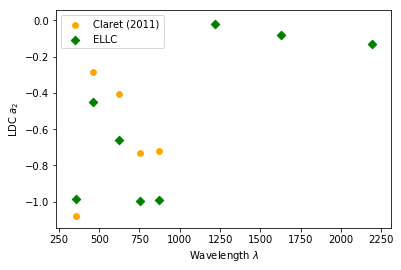

In [348]:
# A2 table values-ellc values plot

table = plt.scatter(SDSSwavelength, tableVals['a2'], c = 'orange', marker = '8')
plt.xlabel('Wavelength $\lambda$')
plt.ylabel('LDC $a_2$')
filt_plot = plt.scatter(SDSSwavelength, filtVals['a2'], c = 'green', marker = 'D')
plt.legend((table, filt_plot),('Claret (2011)', 'ELLC'))

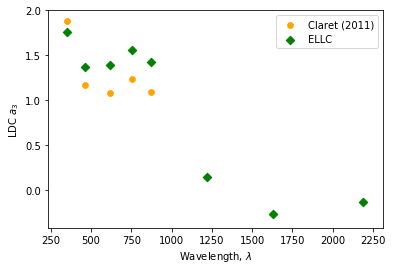

In [349]:
# A3 table values-ellc values plot

table = plt.scatter(SDSSwavelength, tableVals['a3'], c = 'orange', marker = '8')
plt.xlabel('Wavelength, $\lambda$')
plt.ylabel('LDC $a_3$')
filt_plot = plt.scatter(SDSSwavelength, filtVals['a3'], c = 'green', marker = 'D')
plt.legend((table, filt_plot),('Claret (2011)', 'ELLC'))


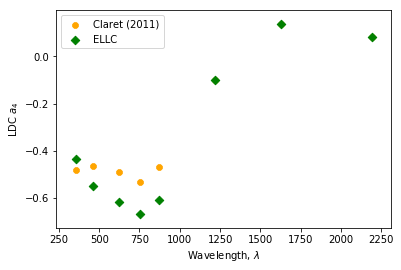

In [350]:
# A4 table values-ellc values plot

table = plt.scatter(SDSSwavelength, tableVals['a4'], c = 'orange', marker = '8')
plt.xlabel('Wavelength, $\lambda$')
plt.ylabel('LDC $a_4$')
filt_plot = plt.scatter(SDSSwavelength, filtVals['a4'], c = 'green', marker = 'D')
plt.legend((table, filt_plot),('Claret (2011)', 'ELLC'))

In [351]:
#ELLC - Table Values Percent Differences

a1_pdiff = (abs(tableVals['a1'] - filtVals['a1'])/(0.5*(tableVals['a1']+filtVals['a1'])))*100
a2_pdiff = (abs(tableVals['a2'] - filtVals['a2'])/(0.5*(tableVals['a2']+filtVals['a2'])))*100
a3_pdiff = (abs(tableVals['a3'] - filtVals['a3'])/(0.5*(tableVals['a3']+filtVals['a3'])))*100
a4_pdiff = (abs(tableVals['a4'] - filtVals['a4'])/(0.5*(tableVals['a4']+filtVals['a4'])))*100
# print(a1_pdiff)
# print(' ')
# print(a2_pdiff)


Text(0,0.5,'% diff Claret - ellc')

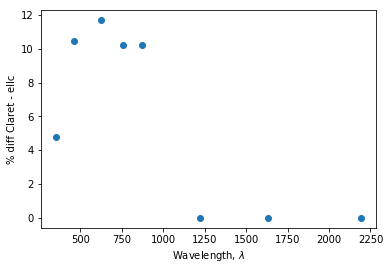

In [352]:
#Plotting LDC differences - A1

plt.scatter(SDSSwavelength, a1_pdiff)
plt.xlabel('Wavelength, $\lambda$')
plt.ylabel('% diff Claret - ellc')

Text(0,0.5,'% diff Claret - ellc')

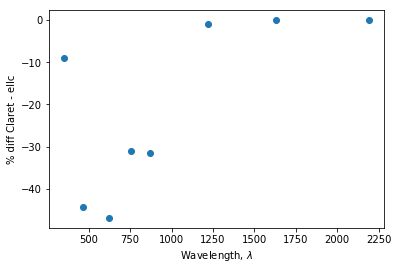

In [353]:
# A2 Percent Difference Plot
plt.scatter(SDSSwavelength, a2_pdiff)
plt.xlabel('Wavelength, $\lambda$')
plt.ylabel('% diff Claret - ellc')

Text(0,0.5,'% diff Claret - ellc')

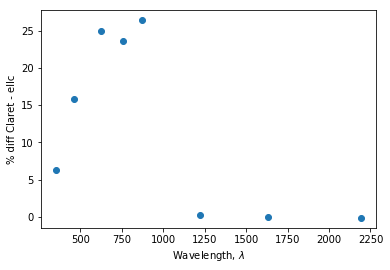

In [354]:
# A3 Percent Difference Plot
plt.scatter(SDSSwavelength, a3_pdiff)
plt.xlabel('Wavelength, $\lambda$')
plt.ylabel('% diff Claret - ellc')

Text(0,0.5,'% diff Claret - ellc')

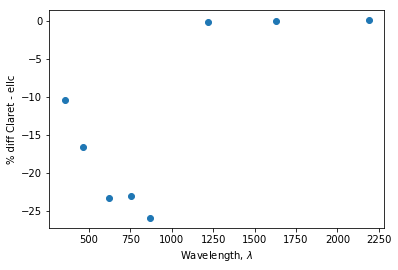

In [355]:
# A4 Percent Difference Plot
plt.scatter(SDSSwavelength, a4_pdiff)
plt.xlabel('Wavelength, $\lambda$')
plt.ylabel('% diff Claret - ellc')

In [356]:
#Simple absolute LDC differences
a1_diff = abs(tableVals['a1'] - filtVals['a1'])
a2_diff = abs(tableVals['a2'] - filtVals['a2'])
a3_diff = abs(tableVals['a3'] - filtVals['a3'])
a4_diff = abs(tableVals['a4'] - filtVals['a4'])

Text(0,0.5,'Claret - ellc, $a_1$')

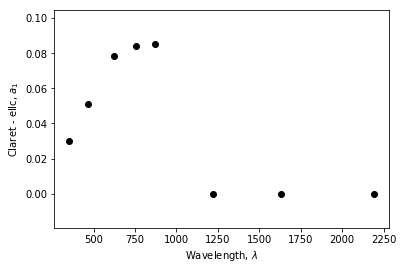

In [357]:
#A1 Difference Plot - NOT pd
plt.scatter(SDSSwavelength, a1_diff, c = 'black')
plt.xlabel('Wavelength, $\lambda$')
plt.ylabel('Claret - ellc, $a_1$')

Text(0,0.5,'Claret - ellc, $a_2$')

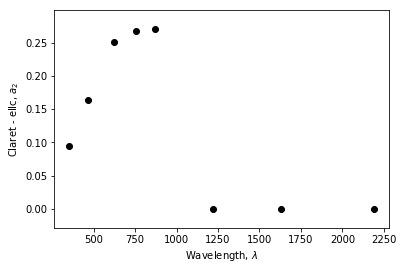

In [358]:
# A2 Difference Plot - NOT pd
plt.scatter(SDSSwavelength, a2_diff, c = 'black')
plt.xlabel('Wavelength, $\lambda$')
plt.ylabel('Claret - ellc, $a_2$')

Text(0,0.5,'Claret - ellc, $a_3$')

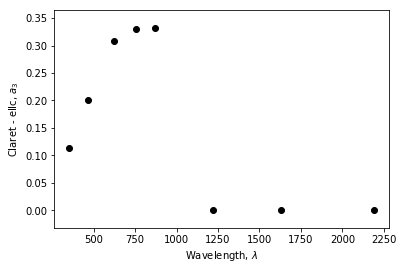

In [359]:
# A3 Difference Plot - NOT pd
plt.scatter(SDSSwavelength, a3_diff, c = 'black')
plt.xlabel('Wavelength, $\lambda$')
plt.ylabel('Claret - ellc, $a_3$')

Text(0,0.5,'Claret - ellc, $a_4$')

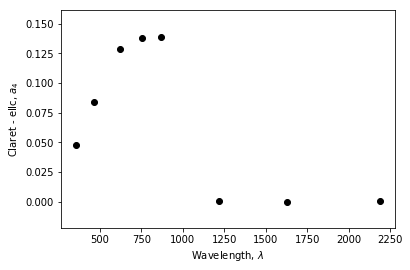

In [361]:
# A4 Difference Plot - NOT pd
plt.scatter(SDSSwavelength, a4_diff, c = 'black')
plt.xlabel('Wavelength, $\lambda$')
plt.ylabel('Claret - ellc, $a_4$')

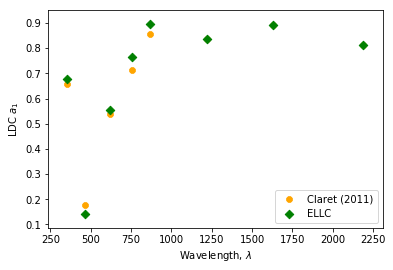

In [370]:
# Different Teff and logg - CONDITIONS #2

T1 = 9000
logg1 = 2.5
Z = 0
M_H = 0


filtVals  = dict()
tableVals = dict()
tableVals['a1'] = np.array([])
tableVals['a2'] = np.array([])
tableVals['a3'] = np.array([])
tableVals['a4'] = np.array([])
filtVals['a1']  = np.array([])
filtVals['a2']  = np.array([])
filtVals['a3']  = np.array([])
filtVals['a4']  = np.array([])

for w,f,t in zip(SDSSwavelength, SDSSfilters, SDSStable_filters):
    ldy_filt = ellc.ldy.LimbGravityDarkeningCoeffs(f)
    a1, a2, a3, a4, y = ldy_filt(T1, logg1, M_H)
    filtVals['a1']  = np.append(filtVals['a1'],a1)
    filtVals['a2']  = np.append(filtVals['a2'],a2)
    filtVals['a3']  = np.append(filtVals['a3'],a3)
    filtVals['a4']  = np.append(filtVals['a4'],a4)
    a1, a2, a3, a4  = get_row(logg1, T1, Z, t)
    tableVals['a1'] = np.append(tableVals['a1'], a1)
    tableVals['a2'] = np.append(tableVals['a2'], a2)
    tableVals['a3'] = np.append(tableVals['a3'], a3)
    tableVals['a4'] = np.append(tableVals['a4'], a4)
    

table = plt.scatter(SDSSwavelength, tableVals['a1'], c = 'orange', marker = '8')
plt.xlabel('Wavelength, $\lambda$')
plt.ylabel('LDC $a_1$')
filt_plot = plt.scatter(SDSSwavelength, filtVals['a1'], c = 'green', marker = 'D')
plt.legend((table, filt_plot),('Claret (2011)', 'ELLC'))


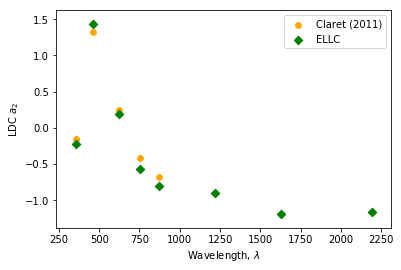

In [371]:
# A2 Plot, Conditions 2
table = plt.scatter(SDSSwavelength, tableVals['a2'], c = 'orange', marker = '8')
plt.xlabel('Wavelength, $\lambda$')
plt.ylabel('LDC $a_2$')
filt_plot = plt.scatter(SDSSwavelength, filtVals['a2'], c = 'green', marker = 'D')
plt.legend((table, filt_plot),('Claret (2011)', 'ELLC'))

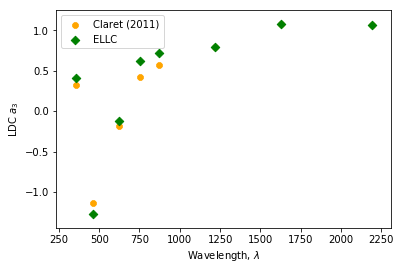

In [372]:
# A3 plot, conditions #2
table = plt.scatter(SDSSwavelength, tableVals['a3'], c = 'orange', marker = '8')
plt.xlabel('Wavelength, $\lambda$')
plt.ylabel('LDC $a_3$')
filt_plot = plt.scatter(SDSSwavelength, filtVals['a3'], c = 'green', marker = 'D')
plt.legend((table, filt_plot),('Claret (2011)', 'ELLC'))

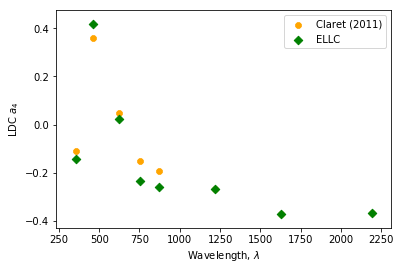

In [373]:
# A4 plot, conditions #2
table = plt.scatter(SDSSwavelength, tableVals['a4'], c = 'orange', marker = '8')
plt.xlabel('Wavelength, $\lambda$')
plt.ylabel('LDC $a_4$')
filt_plot = plt.scatter(SDSSwavelength, filtVals['a4'], c = 'green', marker = 'D')
plt.legend((table, filt_plot),('Claret (2011)', 'ELLC'))